<a href="https://colab.research.google.com/github/AndyCraig200/workout-api/blob/main/repetition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import medfilt
from scipy.stats import mode

In [ ]:
# Plotting
metadata = pd.read_csv("squat.csv")
metadata = medfilt(metadata['box_height'], kernel_size=25)

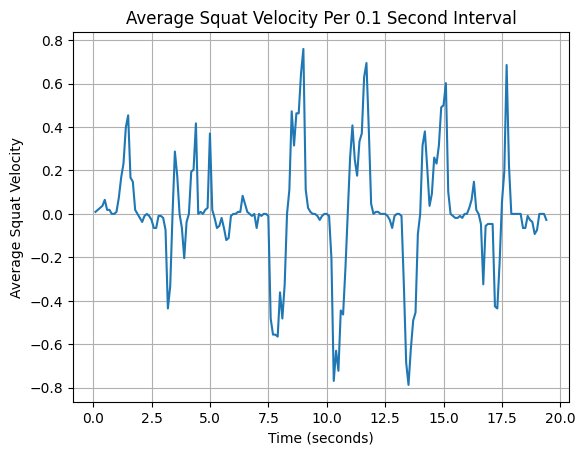

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the squat height data stored in a NumPy array named 'squat_height_data'
# and you have the frame rate information stored in a variable named 'frame_rate'
# and you have the desired time interval stored in a variable named 'interval'
frame_rate = 60
interval = 0.1
# Calculate time difference between consecutive frames
time_diff = 1 / frame_rate  # Assuming constant frame rate

# Calculate change in squat height between consecutive frames
squat_height_diff = np.diff(metadata)

# Calculate rate of change of squat height (velocity)
squat_velocity = squat_height_diff / time_diff

# Generate time array
time_array = np.arange(len(squat_velocity)) * time_diff

# Calculate the number of intervals based on the specified time interval
num_intervals = int(np.ceil(time_array[-1] / interval))

# Initialize arrays to store average velocity per interval and corresponding time
average_velocity_per_interval = np.zeros(num_intervals)
time_per_interval = np.arange(1, num_intervals + 1) * interval

# Calculate average velocity per interval
for i in range(num_intervals):
    start_index = int(i * interval * frame_rate)
    end_index = min(len(squat_velocity), int((i + 1) * interval * frame_rate))
    average_velocity_per_interval[i] = np.mean(squat_velocity[start_index:end_index])

# Plot average velocity per interval against time
plt.plot(time_per_interval, average_velocity_per_interval)
plt.xlabel('Time (seconds)')
plt.ylabel('Average Squat Velocity')
plt.title('Average Squat Velocity Per {} Second Interval'.format(interval))
plt.grid(True)
plt.show()



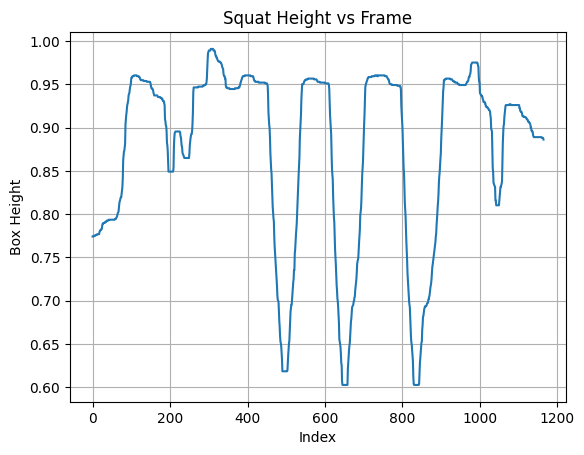

In [ ]:
plt.plot(df.index, smoothed_data)
plt.xlabel('Index')
plt.ylabel('Box Height')
plt.title('Squat Height vs Frame')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import mode

# Assuming you have the squat height data stored in a NumPy array named 'squat_height_data'

# Find the most common value
most_common_value = (mode(metadata)[0]) - 0.01

# Define threshold as 70% of the most common value
threshold = 0.7 * most_common_value

# Initialize variables
num_squats = 0
below_threshold = False
reps = []
# Iterate through the squat height data
for i, height in enumerate(metadata):
    if height < threshold and not below_threshold:
        below_threshold = True
    elif height >= threshold and below_threshold:
        num_squats += 1
        b = i
        f=i
        prev_height = metadata[b]
        next_height = metadata[f]
        while (prev_height <= most_common_value):
            b = b-1
            prev_height = metadata[b]
        reps.append
        while (next_height <=most_common_value):
            f= f+1
            next_height = metadata[f]

        below_threshold = False
        rep = {"start_frame":b,
               "end_frame": f,
               "rep_time": ((f-b)/30)}
        reps.append(rep)
for rep in reps:
  print(rep)



{'start_frame': 450, 'end_frame': 545, 'rep_time': 3.1666666666666665}
{'start_frame': 609, 'end_frame': 706, 'rep_time': 3.2333333333333334}
{'start_frame': 767, 'end_frame': 907, 'rep_time': 4.666666666666667}
